In [26]:
from PIL import Image
import pandas as pd
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [27]:
directory = "./resources/data"
csv_file = "index.csv"
csv_path = os.path.join(directory, csv_file)

In [28]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [29]:
print('File name:', data_name.iloc[1,1])
print('class or y:', data_name.iloc[1,0])

File name: img/fashion1.png
class or y: T-shirt


In [30]:
image_name = data_name.iloc[1,1]
image_path = os.path.join(directory, image_name)

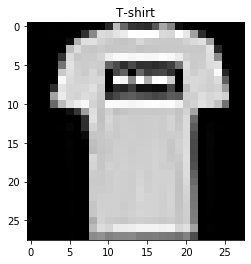

In [33]:
image = Image.open(image_path)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1,0])
plt.show()

In [35]:
class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [36]:
dataset = Dataset(csv_file = csv_file, data_dir=directory)

In [42]:
image = dataset[0][0]
image

In [43]:
y = dataset[0][1]
y

'Ankle boot'

In [44]:
import torchvision.transforms as transforms

In [46]:
transforms.CenterCrop(20)

CenterCrop(size=(20, 20))

In [47]:
transforms.ToTensor()

ToTensor()

In [48]:
croptensor_data_transform = transforms.Compose( [ transforms.CenterCrop(20), transforms.ToTensor()])

In [49]:
dataset = Dataset(csv_file = csv_file, data_dir=directory, transform=croptensor_data_transform)

In [55]:
import torchvision.datasets as dsets

In [58]:
dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:01, 6361953.32it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


32768it [00:00, 380714.16it/s]
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2433062.05it/s]                            
8192it [00:00, 156469.39it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!
